In [67]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [68]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
print(X_train.shape)
data.feature_names

(120, 4)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
print(X_train.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


In [72]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64


#scatterplot

Text(0.5, 1.0, '3D scatter plot')

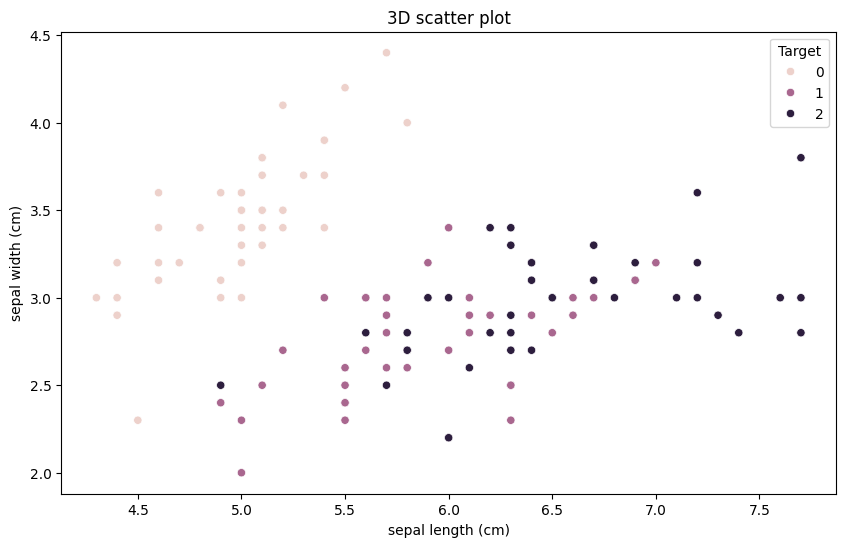

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], hue=y_train)
plt.title('3D scatter plot')

#heatmap

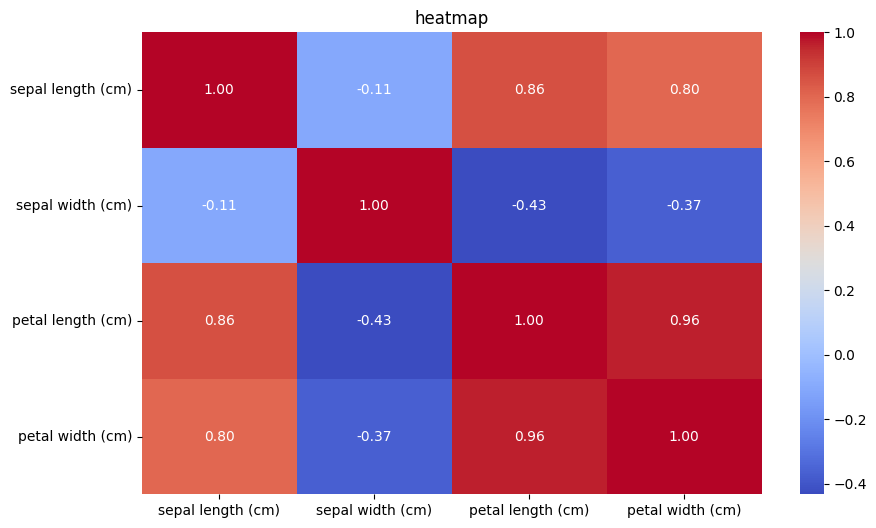

In [74]:
plt.figure(figsize=(10, 6))
plt.title('heatmap')
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#pair plot

<Figure size 1000x600 with 0 Axes>

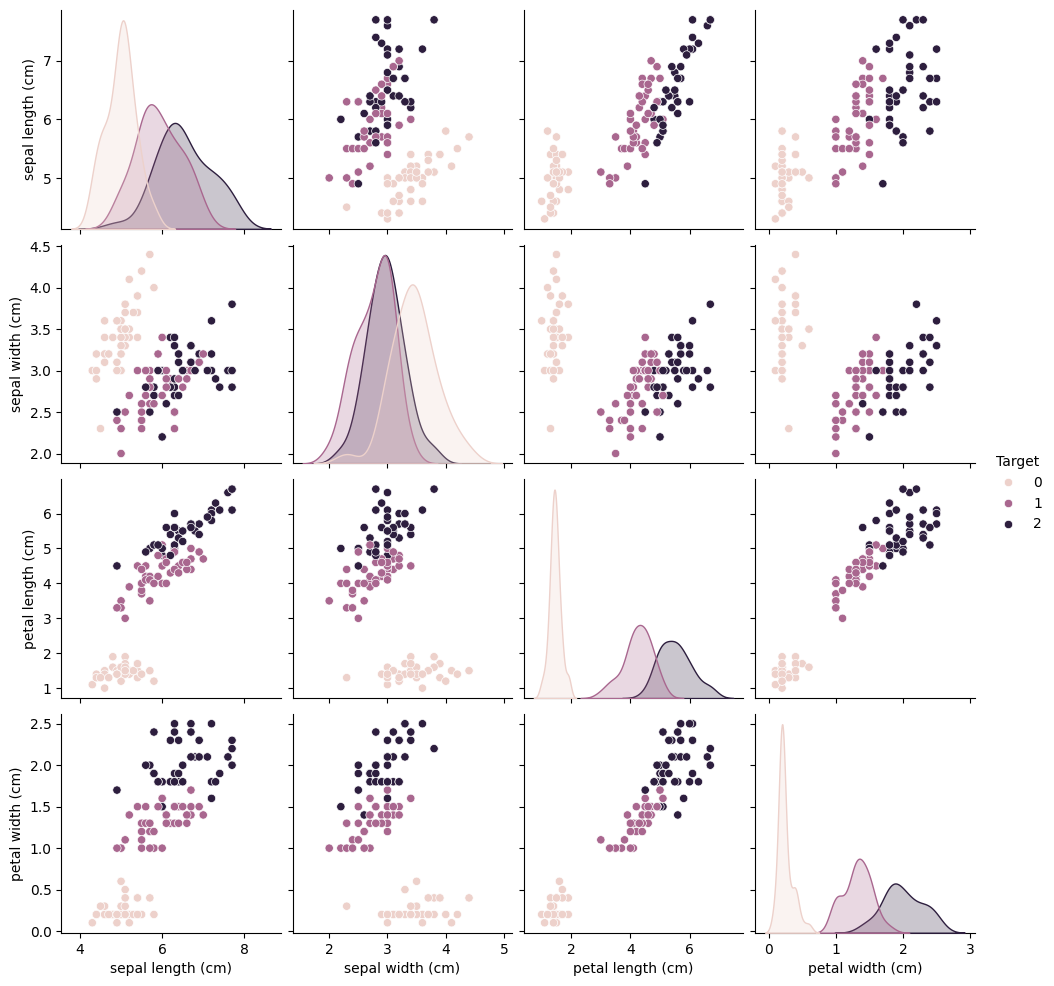

In [75]:
plt.figure(figsize=(10, 6))
sns.pairplot(X_train.join(y), hue='Target')

#apply lda

In [89]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_train)
X_scaled_test = std_scaler.fit_transform(X_test)

In [93]:
lda = LDA() 
X_lda = lda.fit_transform(X_scaled, y_train)
X_lda_test = lda.fit_transform(X_test, y_test)

In [78]:
print(X_lda.shape)

(120, 2)


In [79]:
print(X_lda[:5])

[[ 8.91110247e+00 -8.02090884e-01]
 [ 9.52517945e+00 -2.56380505e+00]
 [-1.38027670e+00  1.09344228e-05]
 [ 7.30302247e+00  9.78245652e-02]
 [ 7.33480436e+00  2.66846659e-01]]


#train an LogisticRegression

In [94]:
log_reg = LogisticRegression()
log_reg.fit(X_lda, y_train)
print("logistic regression score:", log_reg.score(X_lda, y_train))




logistic regression score: 0.9833333333333333


In [95]:
print(log_reg.score(X_lda_test, y_test))

1.0


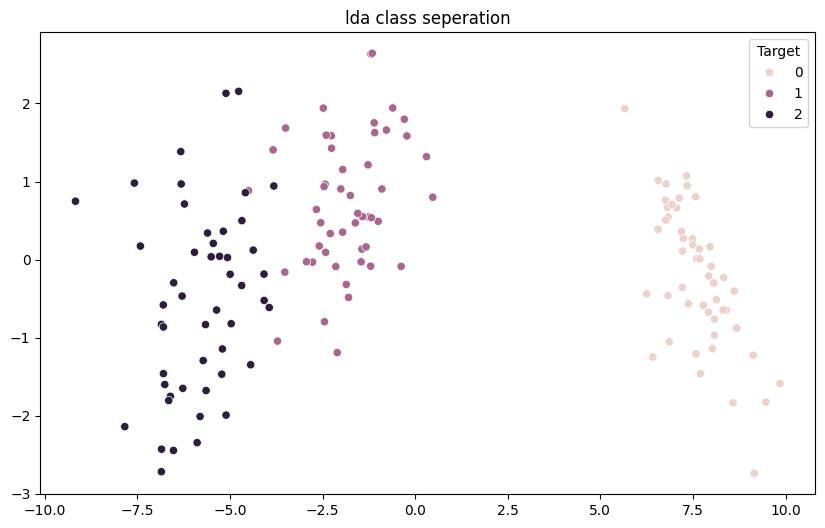

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y)
plt.title('lda class seperation')

plt.show()